#   Aiman Alam<br>

## Table of Contents

<a href='#the_intro'>1. Introduction</a><br>
      - Abstract
    
<a href='#the_bck'>2. Background of the Data</a>

<a href='#the_ppp'>3. Data Preprocessing</a>

	a. Missing Values
	b. Changing Variable Type
	c. Dropping Columns

<a href='#the_eda'>4. Exploratory Data Analysis</a>

	a. Correlation
    b. Boxplot
	c. Barplots
	d. Time Series Analysis
    

<a href='#the_model'>5. Modelling</a>

	a. Regression
		
		 (1). Multiple Linear Regression
		 (2). Decision Tree regression
		 (3). Random Forest Regression
		 (4). Support Vector Regression
		 (5). Comparision of different Regression Algorithm 

	b. Classification

	        (1). Logistic Regression
			     - Confusion Matrix
			     - Plotting Confusion Matrix for Logistic Regression
			     - Evaluation of Model

		    (2). XGBClassifier
		
				- Confusion Matrix
			    - Plotting Confusion Matrix for Logistic Regression
                - Comparision of different Classification Algorithm
                
<a href='#the_r'>6. Results</a>

<a href='#the_c'>7. Conclusion</a>

##  Introduction<a id='the_intro'></a>

For my project I am analyzing the dataset of Yellow Taxi trips records in New York City. For this project I will be analyzing all the features of the dataset. My target variable is 'GootTip' which is a categorical variable. When the tip is above average its value is '1' which denotes that its a good tip , else its value is '0'. 

Lets quickly look at the definition of 'Data Analysis' - Data analysis is the process of modifying, processing, and cleaning raw data in order to obtain useful, pertinent information that supports commercial decision-making. The process offers helpful insights and statistics, frequently presented in charts, graphics, tables, and graphs, which lessen the risks associated with decision-making.

As we go down the project, one can observe that taking help from some libraries I have done few analysis on the variables of my dataset. Later I have implemented it to models to predict the target variable, and check the accuracy.

### Abstract

Let me briefly describe here what one might be expecting below. Going below It can be observed that various analysis and model building has been performed. Initially I did the data Preprocessing where I checked the missing values, changed some variable types and dropped few unnecessary columns.

After that I started with my Exploratory Data Analysis where I first searched for correlation between variables using heatmap, then using box plot and bar plot i did few more analysis between the variables. Later I extracted 'hours' and 'time of the day' for the dateTime values given and did few time series analysis.

I then implemented two types of models- Regression and Classification. In regression I have applied 

         (1). Multiple Linear Regression
		 (2). Decision Tree regression
		 (3). Random Forest Regression
		 (4). Support Vector Regression
         
And then also compared the different models to find the best accuracy.

In Classification I applied 

        (1). Logistic Regression
        (2). XGBclassifier.
        
For both the classifiers I have plotted confusion matrix to observe the performance and later compared the models to find best accuracy.

## Background of the Data <a id='the_bck'></a>

The information in the dataset relates to aspects of cab rides in New York City. The trip records for yellow taxis have fields that record the pick-up and drop-off times and locations, trip distances, itemized fares, rate kinds, payment methods, and driver-reported passenger counts. The Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP) has collected and supplied the data utilized in the linked datasets to the NYC Taxi and Limousine Commission (TLC).

Below are the field names along with their descriptions.


VendorID	-----  A code indicating the TPEP provider that provided the record.
                - Creative Mobile Technologies
                - VeriFone Inc.
                
tpep_pickup_datetime	-----   The date and time when the meter was engaged.

tpep_dropoff_datetime	-----  The date and time when the meter was disengaged.

Passenger_count	-----   The number of passengers in the vehicle. This is a driver-entered value.

Trip_distance  -----	The elapsed trip distance in miles reported by the taximeter.

Pickup_longitude  -----	Longitude where the meter was engaged.

Pickup_latitude  -----	Latitude where the meter was engaged.

RateCodeID	-----           The final rate code in effect at the end of the trip.
                	         - Standard rate
                             - JFK
                             - Newark
                             - Nassau or Westchester
                             - Negotiated fare
                              - Group ride
                    
Store_and_fwd_flag	------   This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
                                    - Y= store and forward trip
                                    - N= not a store and forward trip
                                    
Dropoff_longitude	-----  Longitude where the meter was disengaged.  
Dropoff_ latitude	-----  Latitude where the meter was disengaged.  
Payment_type	-----  A numeric code signifying how the passenger paid for the trip.  
                            - Credit card
                            - Cash
                            - No charge
                            - Dispute
                            - Unknown
                            - Voided trip  
                            
Fare_amount	 -----  The time-and-distance fare calculated by the meter.  

Extra	Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.

MTA_tax	0.50  ------- MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge	-----  0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015

Tip_amount	Tip amount ----- This field is automatically populated for credit card tips.Cash tips are not included.

Tolls_amount	 ----- Total amount of all tolls paid in trip.

Total_amount	-----  The total amount charged to passengers. Does not include cash tips.

GoodTip  -----	Categorical variable indicating an above average tip

Extra -----	An indicator for additional charges included.

Cash  -----	An indicator whether payment was made by cash or not

#### Importing main libraries


In [3]:

import pandas as pd  # used for faster data analysis, data cleaning, and data pre-processing.
import numpy as np   # dimensional arrays and matrices
import matplotlib.pyplot as plt   # for creating static, animated, and interactive visualizations in Python
import seaborn as sns  # used for statistical graphics
import sklearn.metrics as metrics  #provides unsupervised and supervised machine learning algorithms
import itertools  # work on complex iterators
#import XGBClassifier   # provides machine learning algorithms under the gradient boosting methods

In [4]:
#We will first view and observe our dataset. Viewing the first 10 rows with head function.

df = pd.read_csv("Yellow_Taxi_NYC_data.csv", encoding="latin-1") 
df.head(5)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,2,2016-02-19 20:49:53,2016-02-19 20:56:04,2,1.98,-73.972488,40.740479,1,N,...,8.0,0.5,0.5,2.32,0.0,0.3,11.62,True,True,False
1,2,2,2016-02-19 20:50:47,2016-02-19 21:10:37,1,5.40,-74.014214,40.706451,1,N,...,18.5,0.5,0.5,4.95,0.0,0.3,24.75,True,True,False
2,3,2,2016-02-19 20:50:51,2016-02-19 21:06:08,3,3.95,-73.972031,40.762749,1,N,...,14.5,0.5,0.5,3.16,0.0,0.3,18.96,True,True,False
3,4,2,2016-02-19 20:50:53,2016-02-19 21:09:33,3,6.38,-74.007317,40.727219,1,N,...,21.5,0.5,0.5,4.56,0.0,0.3,27.36,True,True,False
4,5,1,2016-02-19 20:51:06,2016-02-19 21:03:52,2,1.80,-73.967987,40.755184,1,N,...,10.0,0.5,0.5,2.25,0.0,0.3,13.55,True,True,False


#  Data Preprocessing<a id='the_ppp'></a>

Let us now dive liitle deep into our dataset and see what are our variables and their types.
we will also check if we need some data cleaning like removing null or missing values, dropping unneccessary columns and also if datatype of any variable is required to be changed.

Let us now check the description and datatypes of our dataset

Here we check the dimensions of the data with shape funcetion.
Here we observe that a tuple is returned with values 28454 and 23. This means this dataset has 28454 Rows and 23 Columns

In [5]:
df.shape

(28454, 23)

We observe that there are 28454 rows and 23 columns in our dataset.

In [6]:
#I would now want to check a basic summary of my dataset.
#The info function displays some important information about dataset like non-nulls counts, dtype, column name and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

NOTE: We have 2 variables - tpep_pickup_datetime, tpep_dropoff_datetime which are of 'object' type.

In [7]:
#I would now like to see a descriptive analysis of my dataset. For this I use a describe function.

df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.536164,1.659802,2.827996,-72.916325,40.168268,1.034723,-72.988478,40.209015,1.330498,12.323078,0.328460,0.497909,1.777476,0.296811,0.299673,15.523379
std,8214.106616,0.498699,1.313064,3.486895,8.783958,4.838956,0.268661,8.480576,4.672075,0.484606,11.535430,0.445919,0.036122,2.834691,3.453858,0.013887,14.782319
min,1.000000,1.000000,0.000000,0.000000,-74.177452,0.000000,1.000000,-74.549500,0.000000,1.000000,-52.000000,-1.000000,-0.500000,-12.000000,0.000000,-0.300000,-52.800000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991745,40.736157,1.000000,-73.991377,40.734653,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.640000,-73.981773,40.753139,1.000000,-73.979729,40.753914,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,21340.750000,2.000000,2.000000,3.010000,-73.967148,40.767875,1.000000,-73.962410,40.769669,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.160000
max,28454.000000,2.000000,6.000000,49.700000,0.000000,41.017006,6.000000,0.000000,41.078926,4.000000,850.000000,4.500000,0.500000,255.050000,540.000000,0.300000,1105.350000


The describe functions helps us to know various important information about our dataset. As we can observe below, this function has provided us the count, mean, standard deviation, minimum and maximum values, upper, middle and lower quartiles for each attributes. We shall notice that these calculations has only been performed on the numerical columns of the dataset.

Looking at the values its not hard to analyze that few of our variables are not normaliyed, for example, lets observe passenger_count. The min is 0.000000 and max is 6.000000 but the mean is 1.659802. This clearly shows that the graph would be left skewed. I will be plotting the graph later to observe it visually. Lets take another example - trip_distance. The min is 0.000000 and max is 49.700000 but the mean is 2.827996. This also shows that the graph would be left skewed. 

### Missing Values

Let us first find if our dataset has any missing values.

In [8]:
#To find if missing values are present in my dataset I use isnull function. 

df.isnull()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


All answers looks like false but lets be sure by summing up

In [9]:
#I am using sum function to check total number of missing values.

print(df.isnull().sum())

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64


It is very clear that each variable has sum equals to zero, therefore we can conclude, there is no missing values in our dataset.

Now I want to extract the month day and time details from the variable - tpep_pickup_datetime and tpep_dropoff_datetime provided to us. So that I can use it later to do some analysis.

### Changing the Variable type

First we change the data type of out two date time variables given, for this I have used  to_datetime function.

In [10]:
#changing the datatype of the variable 'tpep_pickup_datetime' from object to datetime

print (df['tpep_pickup_datetime'].dtype)
object

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

print (df['tpep_pickup_datetime'].dtype)


object
datetime64[ns]


In [11]:
#changing the datatype of the variable 'tpep_dropoff_datetime' from object to datetime


print (df['tpep_dropoff_datetime'].dtype)
object

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

print (df['tpep_dropoff_datetime'].dtype)


object
datetime64[ns]


In [12]:
df['Year'] = df['tpep_pickup_datetime'].dt.year
df['Month'] = df['tpep_pickup_datetime'].dt.month
df['Day'] = df['tpep_pickup_datetime'].dt.day


Now I have created a new column named Travel_time which dictates the total duration of the travel. I obtain this by calculating the difference of tpep_pickup_datetime from tpep_dropoff_datetime and insert this column using Loc function at position 4. Also, I personally find these two variables names very lengthy so I have changed the column names to a shorter one.


In [13]:
#Calculating the difference between the two date time variables and storing it in new variable. adding the new variable 
#Travel_time in our dataset.

duration =(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60
df.insert(loc=4, column='Travel_time', value = duration)

In [14]:
#Changing the column names to a shorter name

df.rename(columns = {'tpep_pickup_datetime':'pickup_time'}, inplace = True)
df.rename(columns = {'tpep_dropoff_datetime':'Drop_time'}, inplace = True)


Let us now check our new data frame with changed column names and the 4 new variables(Year, Month, Day, Travel_time) added.

In [15]:
df.head(5)

,Unnamed: 0,VendorID,pickup_time,Drop_time,Travel_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash,Year,Month,Day
0,1,2,2016-02-19 20:49:53,2016-02-19 20:56:04,6.183333,2,1.98,-73.972488,40.740479,1,...,2.32,0.0,0.3,11.62,True,True,False,2016,2,19
1,2,2,2016-02-19 20:50:47,2016-02-19 21:10:37,19.833333,1,5.40,-74.014214,40.706451,1,...,4.95,0.0,0.3,24.75,True,True,False,2016,2,19
2,3,2,2016-02-19 20:50:51,2016-02-19 21:06:08,15.283333,3,3.95,-73.972031,40.762749,1,...,3.16,0.0,0.3,18.96,True,True,False,2016,2,19
3,4,2,2016-02-19 20:50:53,2016-02-19 21:09:33,18.666667,3,6.38,-74.007317,40.727219,1,...,4.56,0.0,0.3,27.36,True,True,False,2016,2,19
4,5,1,2016-02-19 20:51:06,2016-02-19 21:03:52,12.766667,2,1.80,-73.967987,40.755184,1,...,2.25,0.0,0.3,13.55,True,True,False,2016,2,19


### Dropping Columns

Now there are few columns in the dataset which I consider not to be very useful, therefore I will be dropping those columns.

In [16]:
#dropping unnamed: 0 and ratecodeID using drop function

df = df.drop(columns=['Unnamed: 0', 'RatecodeID'], axis=1) 

In [17]:
#Let check if the 2 columns has been successfully dropped from our dataset

df.head(5)

,VendorID,pickup_time,Drop_time,Travel_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash,Year,Month,Day
0,2,2016-02-19 20:49:53,2016-02-19 20:56:04,6.183333,2,1.98,-73.972488,40.740479,N,-73.959175,...,2.32,0.0,0.3,11.62,True,True,False,2016,2,19
1,2,2016-02-19 20:50:47,2016-02-19 21:10:37,19.833333,1,5.40,-74.014214,40.706451,N,-73.982483,...,4.95,0.0,0.3,24.75,True,True,False,2016,2,19
2,2,2016-02-19 20:50:51,2016-02-19 21:06:08,15.283333,3,3.95,-73.972031,40.762749,N,-73.908852,...,3.16,0.0,0.3,18.96,True,True,False,2016,2,19
3,2,2016-02-19 20:50:53,2016-02-19 21:09:33,18.666667,3,6.38,-74.007317,40.727219,N,-73.967018,...,4.56,0.0,0.3,27.36,True,True,False,2016,2,19
4,1,2016-02-19 20:51:06,2016-02-19 21:03:52,12.766667,2,1.80,-73.967987,40.755184,N,-73.991058,...,2.25,0.0,0.3,13.55,True,True,False,2016,2,19


As we can see those 2 columns are not in our dataset anymore.

#  Exploratory Data Analysis<a id='the_eda'></a>

For my dataset analysis I am first going to check the correlation between the variables and plot a heat map for it.

### Correlation

In [18]:
#Finding correlations between the variables using iloc function

corr_df = df.iloc[:, 1:-3].corr()
corr_df

,Travel_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
Travel_time,1.000000,0.020804,0.158187,-0.003815,0.003808,-0.005785,0.005716,-0.007377,0.147924,0.022759,-0.002282,0.077947,0.033337,0.006596,0.138856,0.061836,-0.010805,-0.005936
passenger_count,0.020804,1.000000,0.015733,-0.015440,0.015385,-0.012598,0.012542,0.007911,0.011997,-0.001591,0.008342,0.001872,0.006567,0.001419,0.011230,-0.004865,-0.005358,0.015349
trip_distance,0.158187,0.015733,1.000000,0.003812,-0.003382,-0.004467,0.004695,-0.066138,0.819593,0.116826,-0.074576,0.488245,0.245129,0.018663,0.793832,0.301546,0.004687,-0.068182
pickup_longitude,-0.003815,-0.015440,0.003812,1.000000,-0.999978,0.876768,-0.876693,0.005310,0.029220,-0.015109,-0.054501,0.017459,0.000524,-0.010002,0.025674,0.005892,-0.017344,0.004922
pickup_latitude,0.003808,0.015385,-0.003382,-0.999978,1.000000,-0.876745,0.876694,-0.004952,-0.028821,0.014882,0.054418,-0.017187,-0.000148,0.009907,-0.025230,-0.006112,0.016734,-0.004556
dropoff_longitude,-0.005785,-0.012598,-0.004467,0.876768,-0.876745,1.000000,-0.999949,0.014572,0.016351,-0.012107,-0.048065,0.007865,0.000020,-0.017137,0.013774,-0.002287,-0.014322,0.014319
dropoff_latitude,0.005716,0.012542,0.004695,-0.876693,0.876694,-0.999949,1.000000,-0.014147,-0.016154,0.012116,0.048464,-0.007922,0.000179,0.017094,-0.013583,0.001967,0.014126,-0.013875
payment_type,-0.007377,0.007911,-0.066138,0.005310,-0.004952,0.014572,-0.014147,1.000000,-0.068229,-0.022337,-0.045848,-0.428784,-0.012482,-0.082654,-0.139250,-0.539699,-0.031160,0.948641
fare_amount,0.147924,0.011997,0.819593,0.029220,-0.028821,0.016351,-0.016154,-0.068229,1.000000,0.077276,-0.179801,0.686627,0.209977,0.050090,0.963024,0.300493,-0.033413,-0.068096
extra,0.022759,-0.001591,0.116826,-0.015109,0.014882,-0.012107,0.012116,-0.022337,0.077276,1.000000,0.047552,0.075289,0.018499,0.037769,0.109382,0.050463,0.773423,-0.020533


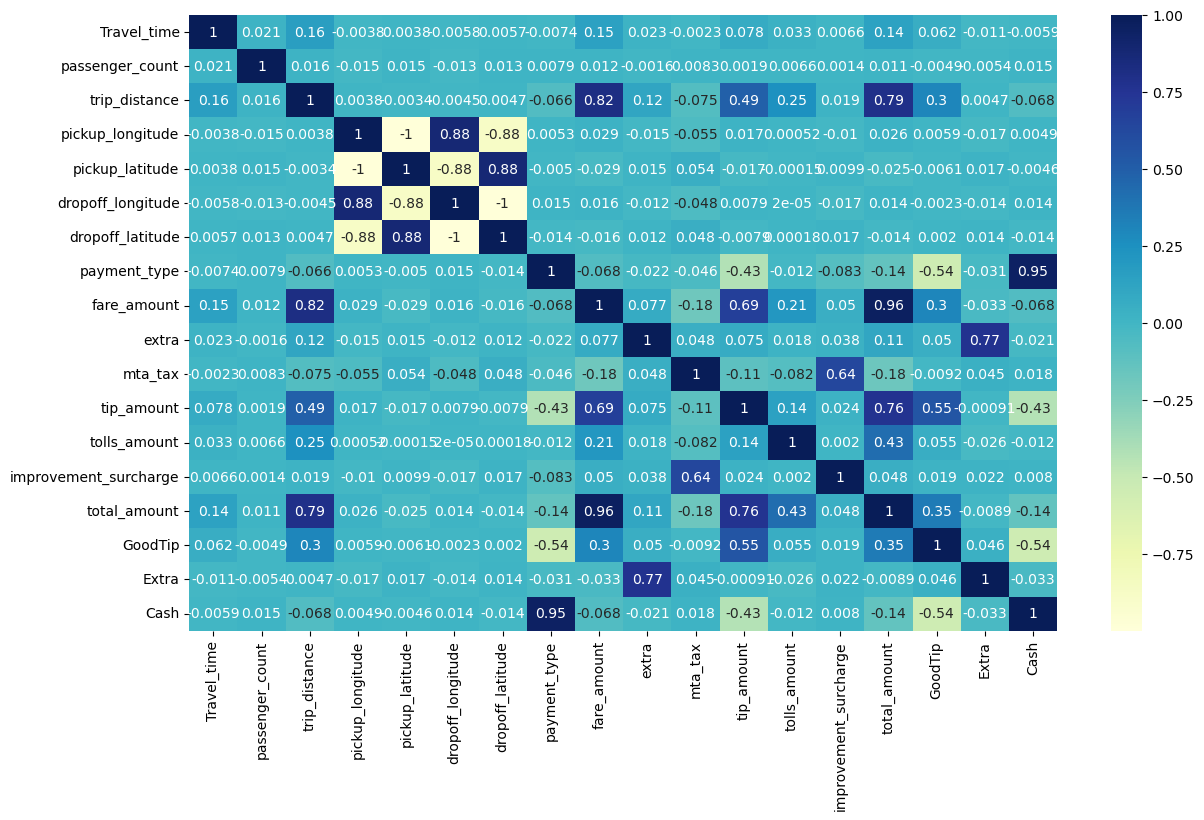

In [19]:
#Creating a heatmap to pinpoint the columns in the DataFrame exhibiting high correlation.

plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_df, annot=True, cmap='YlGnBu')  # 'annot=True' fills the R values in the heatmap cells.

plt.show()

We can clearly observe that my target variable - GoodTip exhibits highest correlation with tip_amount which is logical, as it is the value of tip_amount which signifies that the tip is a good one or not. And we also observe that least correlation is with 'payment_type' and 'cash' which might mean that either generally passengers dont pay in cash or if they do they don't give tip.

We can observe that there are few other variables which shows very high correlation for example- 'fare_amount' with 'total_amount', payment_type with 'cash', 'pickup_longitude' with 'dropoff_longitude' and 'tip_distance' with 'fare_amount' which also seems logically, as farther the distance higher the fare charged will be.

### Boxplot - Checking outliers

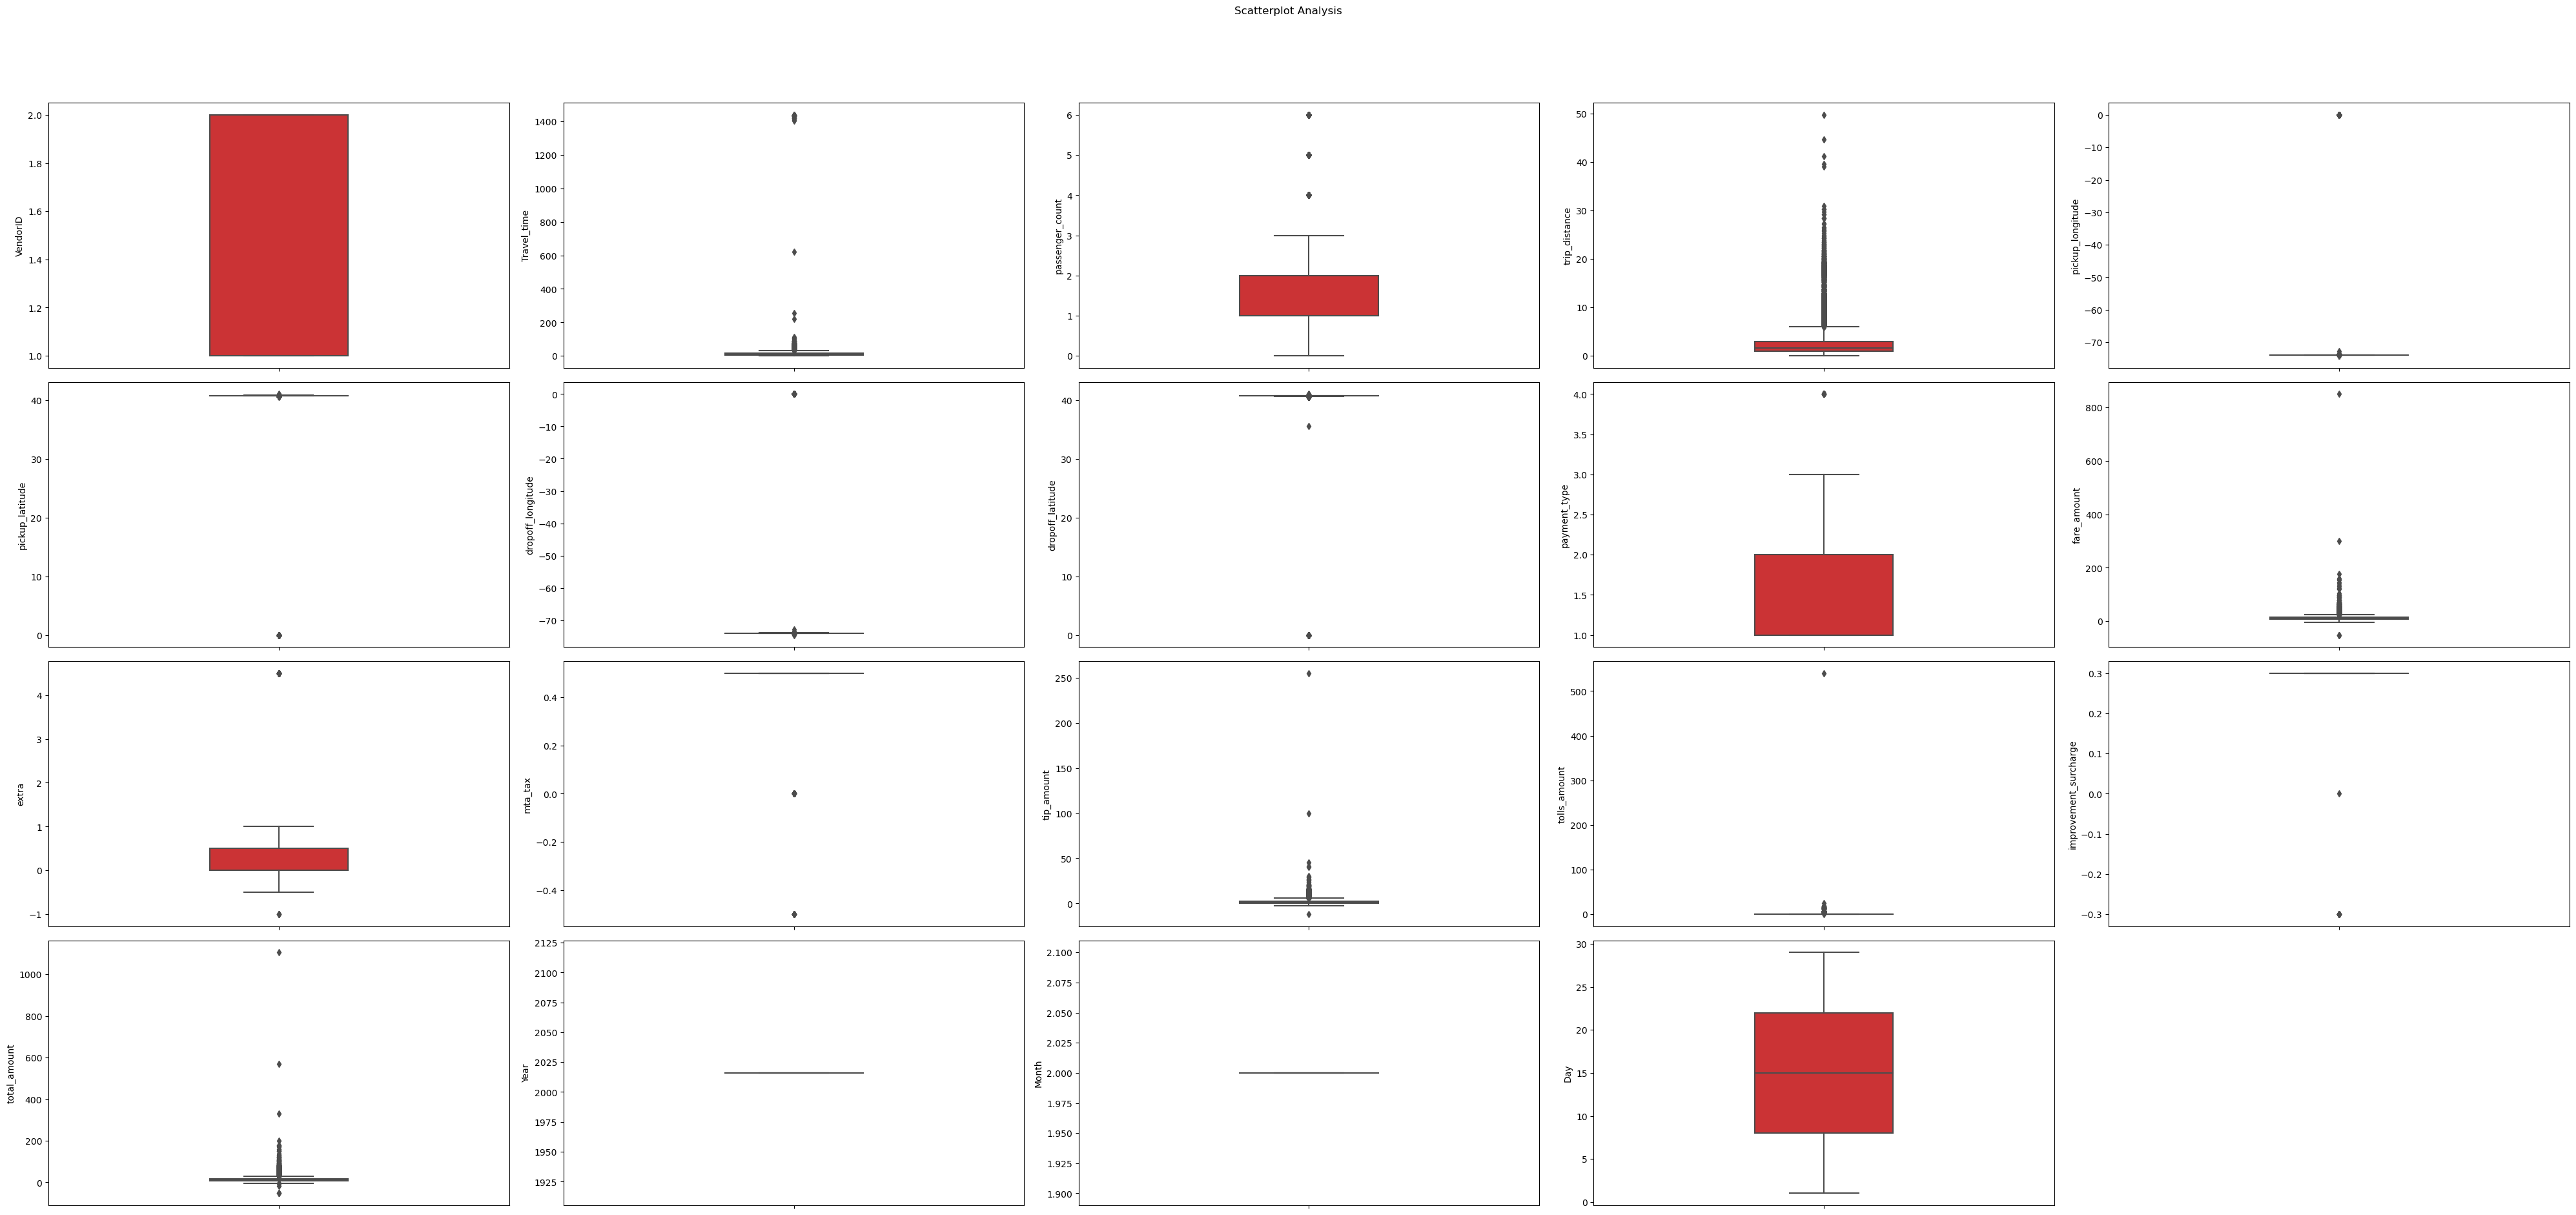

In [20]:
#creating boxplots for all the variables to view and understand the outliers and what reason they might portray. 
#for this I use boxplot function

num=df.select_dtypes(include=[np.number])
fig = plt.figure(figsize = (40, 50))
j = 0
for i in num.columns:
    plt.subplot(11, 5, j+1)
    j += 1
    sns.boxplot(y=num[i], width=0.3, palette="Set1")
fig.suptitle('Scatterplot Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

I use box plot to see the outliers of all the variables. Here we observe that, few variables have some outliers whereas few has very large number of outliers.

It can also be observed that few attributes have their outliers at very far distance like pickup_longitude- which might signify that few pickups are done from far distance from the general pickup area, tolls_amount which might signify that for some taxis at times pays very high toll amount, dropoff_longitude which means some passengers takes drop very far away from local area, for example may be in outskirts of city or another town.

Travel time also shows great variation which might also signify that few passengers take drop offs very far away from their pickup point like travel between different towns or stations.


### Barplots (EDA)

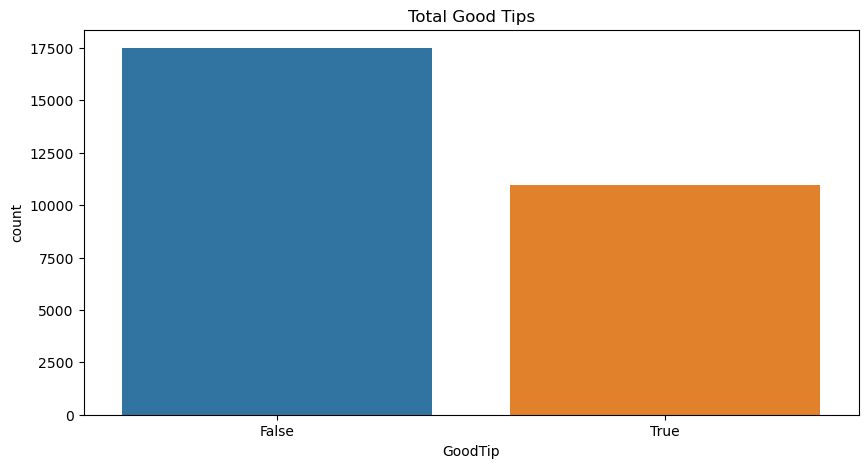

In [21]:
#  For the target variable- 'good tip' I would like to check that, are most of the tips a GoodTip or not? 
#for this i have used countplot function

figure,(ax9)=plt.subplots(ncols=1,figsize=(10,5))

ax9.set_title('Total Good Tips')
ax=sns.countplot(x="GoodTip",data=df,ax=ax9)


We can observe above that unfortunately for drivers, most of the tips donot lie under 'GoodTip' category. We can see that most of it lies under false, whereas approximately 50% of total can be considered as a good tip.

<AxesSubplot:xlabel='VendorID', ylabel='passenger_count'>

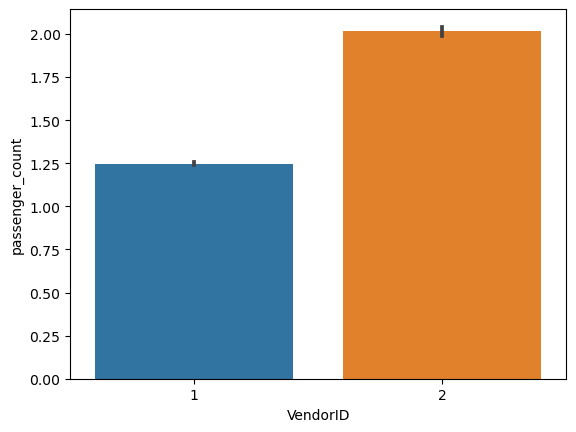

In [22]:
# lets check which one of the vendors had more passengers.

sns.barplot(y='passenger_count',x='VendorID',data=df,estimator=np.mean)

It is quite visisble that our vendor 2 has been lucky in terms of having most passengers. Its can be due to various reasons, maybe the driver supposedly be in a high populated region, or a region where there are higher number of offices and other working offices.

<AxesSubplot:xlabel='GoodTip', ylabel='Good and Bad tip for each Vendor ID'>

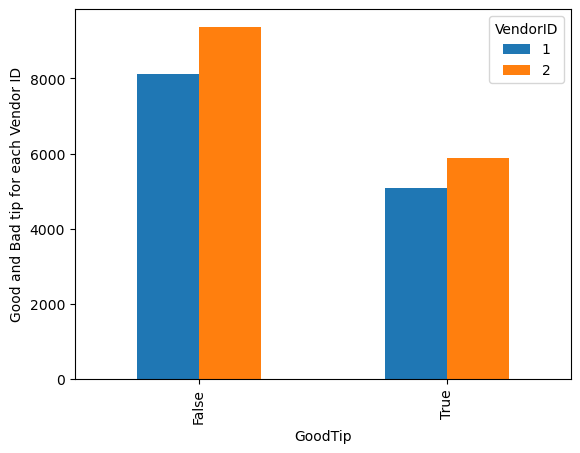

In [23]:
#I have created a bar plot to understand which vendor has recieved more Good Tips.
#I have used here the count function to count total number of Good Tip.

df.groupby('GoodTip')['VendorID'].value_counts().unstack().plot.bar(ylabel='Good and Bad tip for each Vendor ID')


We can quite well observe that both the vendors have recieved more 'non-good tips'( as for both the vendors, the 'false' plot is higher than the 'true') than 'good tips'. Also, 'vendor 2' has got more number of good tips than the 'vendor 1'. We can say this justifiabiliy as well because vendor 2 has travelled more passengers than vendor 1 as observed above, so this they would have got chance to gain more tips.

<AxesSubplot:xlabel='VendorID', ylabel='Travel_time'>

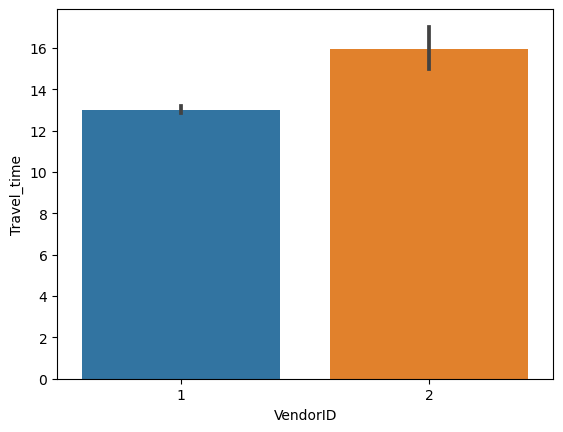

In [24]:
#Lets do another anaylsis for our 2 vendor types. I am curios to see which vendor has highest 'travel_time', in other words,
#has taken most time to reach destination from its source point.

sns.barplot(y='Travel_time',x='VendorID',data=df,estimator=np.mean)

Although the difference is not very large, however we can say that vendor 2 has taken most Travelling time. But its not tough to justify it, because we have already observed above that vendor 2 has taken most number of passengers.

In [25]:
#   Using value_count function, I want to know which number of passengers has the highest count

df.passenger_count.value_counts()

1    20240
2     4074
5     1529
3     1117
6      938
4      554
0        2
Name: passenger_count, dtype: int64

We can observe that highest trips are taken by single passengers that is 20240. And the least is 0 passenger which is equal to 2 , but it might be an error, or the passenger might have cancelled the trip later.
 
It is very clear that most people like to travel alone. Multiple reasons can be involved, for example to save time. Another reason, most of the times the routes of different passengers might not be the same. 

Least ones are with 0 passengers but thats obvious. Apart from that 4 passengers have the least count, may be because in small cars has 5 seats and 4 people sitting apart from driver makes it very congested.

Lets visualise the same output below, in form of a plot for better understanding.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

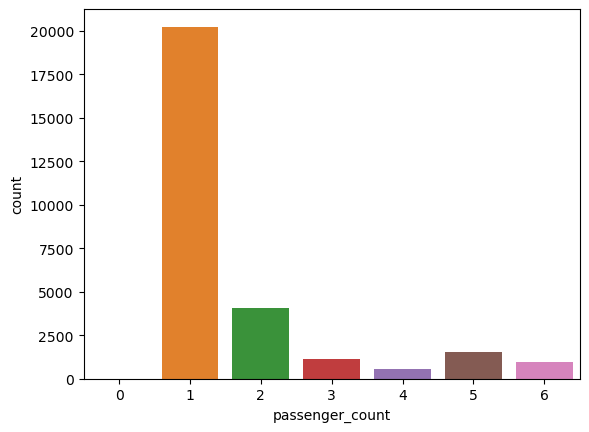

In [26]:
#Likewise above, we see that highest count is in 'number of passenger =1' , 
#and we use countplot function to visualise it in form of plots

sns.countplot(x='passenger_count',data=df)

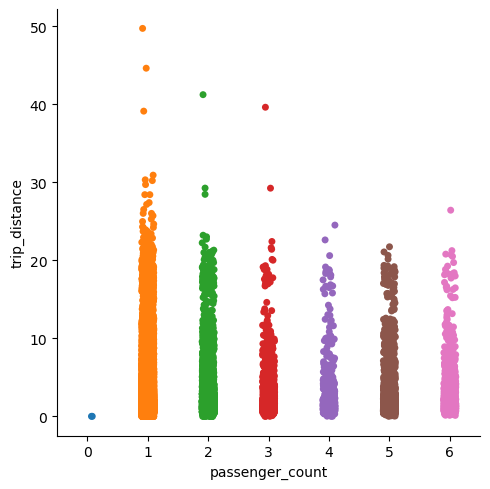

In [27]:
#   Let us see for which 'number of passengers'  the 'trip distances' are highest

sns.catplot(y='trip_distance',x='passenger_count',data=df,kind='strip')

Lets observe. Above, the trip distance are highest for passengers travelling alone. The least ones are when 'number of passengers=5'. It might be because when a passenger need to travel far (like different town or station) they prefer to travel alone to save time, also other passengers tends to avoid sharing such cabs again for same 'time saving' reason.

I want to check if 'trip_distance' plays a role in giving a 'good tip' to the driver.
we observe below that higher tips has been given by passengers who had a long distance trip.

<AxesSubplot:xlabel='GoodTip', ylabel='trip_distance'>

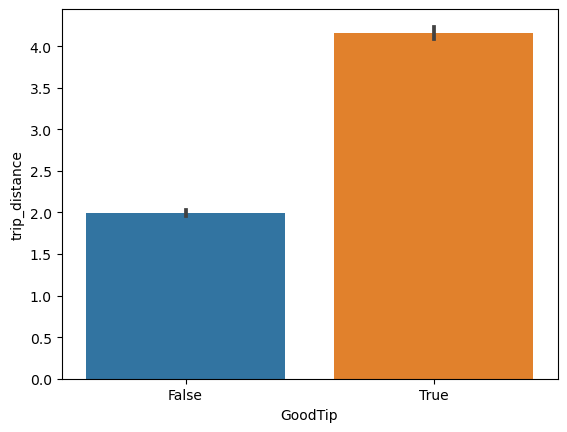

In [28]:
 # I am using a barplot to visualize here

sns.barplot(y='trip_distance',x='GoodTip',data=df,estimator=np.mean)

<AxesSubplot:xlabel='GoodTip', ylabel='tip_amount'>

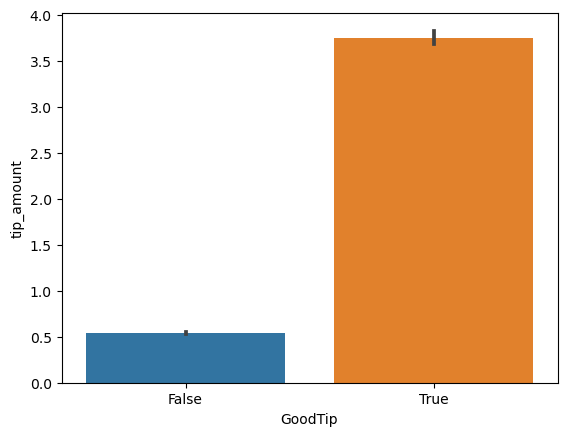

In [29]:
#  Similarly, since our correlation analysis showed a very good relation between 'tip_amount' and 'good tip',
#  let view it via a plot. Here as well I have used bar plot

sns.barplot(y='tip_amount',x='GoodTip',data=df,estimator=np.mean,)

And its very understandable that higher the 'tip_amount', better the tip will be.

### Time Series Analysis

In order to do more elaborated and interesting analysis I will extract the 'pickup hour', 'drop hour' and 'time of the day' from the information provided in the variable 'pickup_time' and 'drop_time'.

However, in order to avoid any sort of complexity in modelling, I will drop them after the analysis is done before starting the modelling.

In [30]:
#extracting the exact hour of pickup and drop and storing into new columns using hour function

df['pickup_hour']=df['pickup_time'].dt.hour
df['dropoff_hour']=df['Drop_time'].dt.hour

Defining a function time_of_day(x): here i have divided the hours of the day into 4 different ranges.
6 am - 12 pm denotes 'morning' time.  12 pm - 4 pm denotes 'evening' time.   4 pm - 10 pm denotes 'evening' time. 
and after that lies in the category of 'late night'
I pass these value in 'x', and when function is called, according to the hour of pickup or drop, it is put into one of these
'time_of_day' category


In [31]:
#defining function  and distributing the ranges 

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [32]:
# extracting 'pickup time of the day' and the 'drop time of the day' by calling the function

df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)
    
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)

In [33]:
#  Lets check our new dataset with the new interesting columns

df.head(4)

,VendorID,pickup_time,Drop_time,Travel_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,...,GoodTip,Extra,Cash,Year,Month,Day,pickup_hour,dropoff_hour,dropoff_timeofday,pickup_timeofday
0,2,2016-02-19 20:49:53,2016-02-19 20:56:04,6.183333,2,1.98,-73.972488,40.740479,N,-73.959175,...,True,True,False,2016,2,19,20,20,Evening,Evening
1,2,2016-02-19 20:50:47,2016-02-19 21:10:37,19.833333,1,5.40,-74.014214,40.706451,N,-73.982483,...,True,True,False,2016,2,19,20,21,Evening,Evening
2,2,2016-02-19 20:50:51,2016-02-19 21:06:08,15.283333,3,3.95,-73.972031,40.762749,N,-73.908852,...,True,True,False,2016,2,19,20,21,Evening,Evening
3,2,2016-02-19 20:50:53,2016-02-19 21:09:33,18.666667,3,6.38,-74.007317,40.727219,N,-73.967018,...,True,True,False,2016,2,19,20,21,Evening,Evening


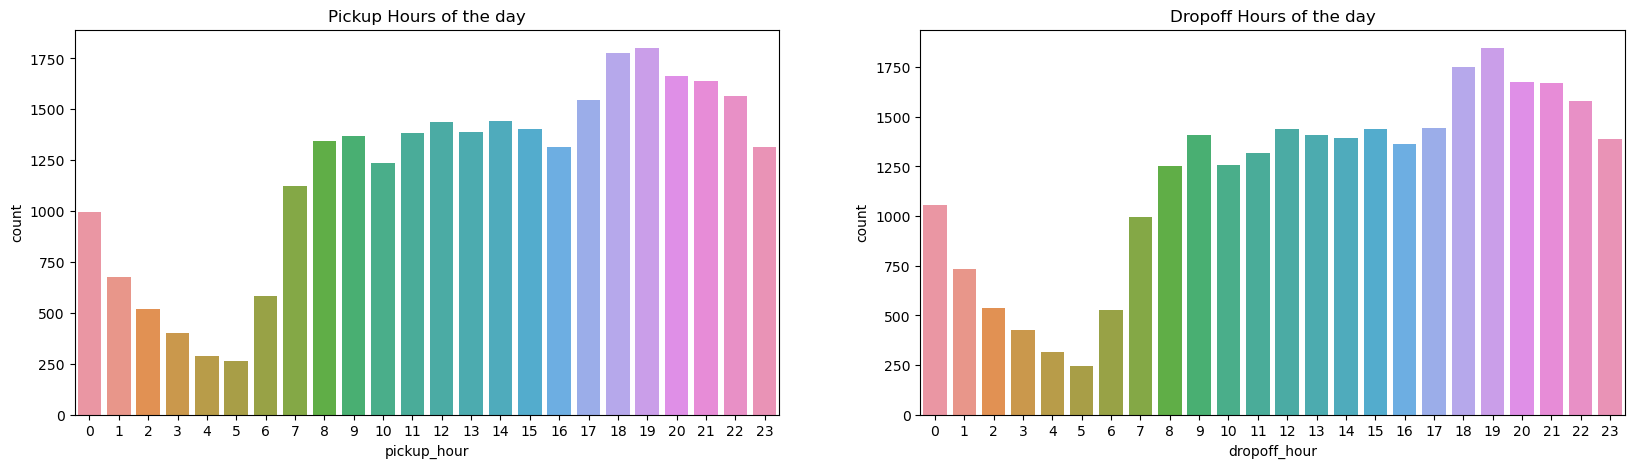

In [34]:
#  Lets check which hour of the day is the busiest hour of the day, for both pickup and drop.
# to count the values and plot, I have used countplot function

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Hours of the day')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)

ax10.set_title('Dropoff Hours of the day')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

The plot looks beautiful and shows that the busiest time of the day for pick up lies between 17:00 hrs to 22:00 hrs. Also, the busiest time period for drops are 18:00 hrs to 22:00 hrs. It can be justified because mostly during this time people return to their home from offices. Also generally people go for some outing during the evening time.

Its also very logical to observe that most silent times are the night times, that is between 1 am to 6am for both pickup and drops.

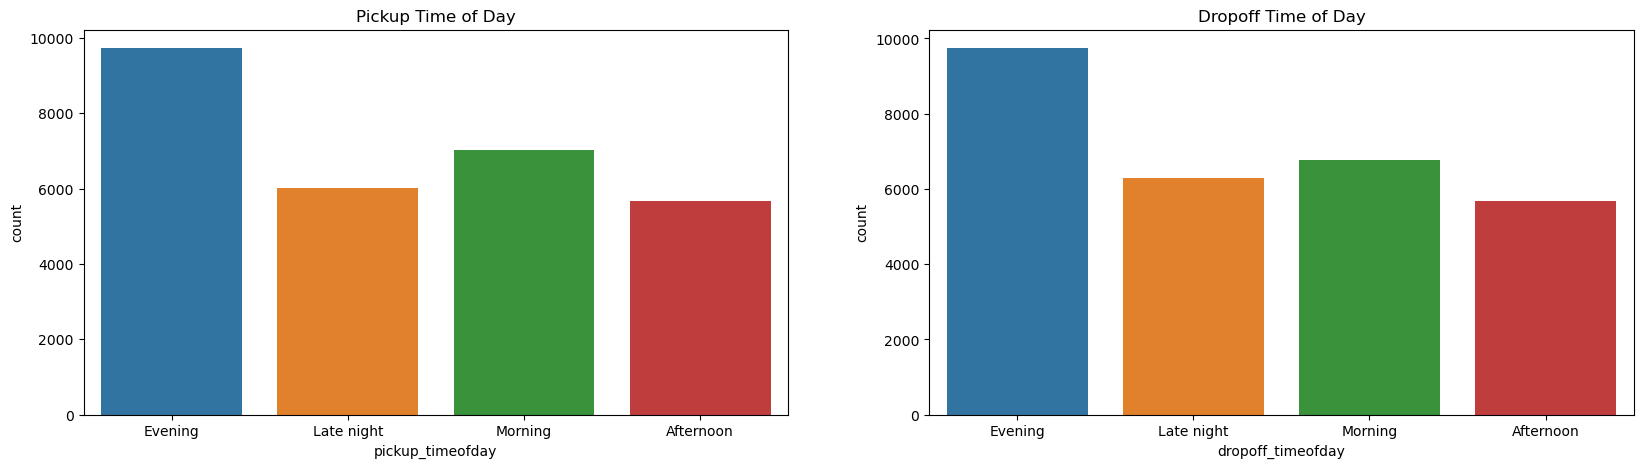

In [35]:
#  Lets check which 'time of the day' are usually most busy. For this i have again used countplot

figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

We see that most of the pickups and drops are done in the evening time, can be the same reasons as mentioned above. The least ones are done during the 'afternoon time' and 'late night'. Also after evening highest pickups and drops are during morning, as people would leave for their offices, university, schools and other works.

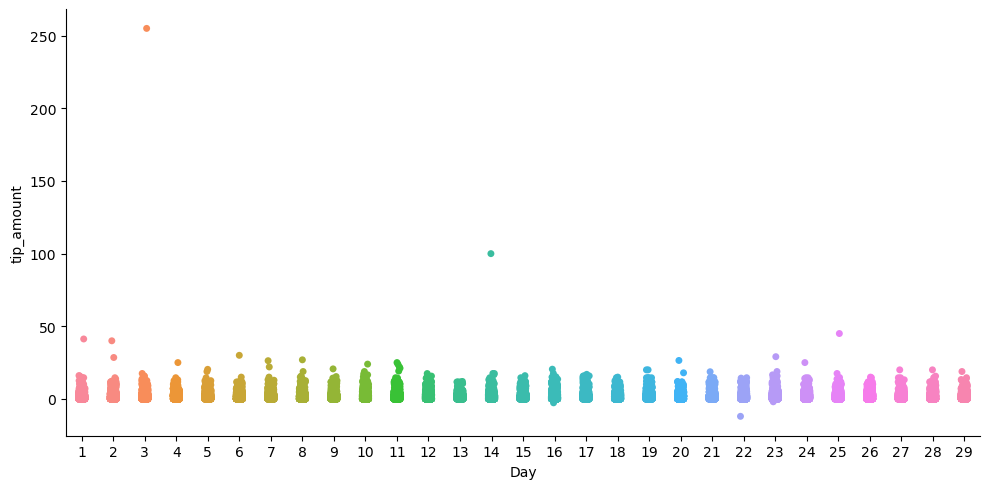

In [36]:
#  Lets see how the 'tip_amount' is distributed over the 'days' of the month. I have used catplot function for same.

sns.catplot(y='tip_amount',x='Day',data=df,kind='strip', height=5, aspect=2)

It is quite interesting to see that the range of the 'tip amount' is generally the same through the month. However, we can observe that there are few outliers as well. This can denote that at times some passengers might give a very good tip of higher amount than ususal.

### Dropping non necessary columns before modelling

Now my analysis is completed so I will drop the columns I added for Time series Analysis and few other 
timestamp and datetime values that might cause complication in model building. 
To prevent confusion, I have stored the new dataset into a new dataframe after dropping.

In [37]:
df_model = df.drop(columns=['pickup_time', 'Drop_time', 'Travel_time', 'Year', 'Month', 'Day', 'pickup_hour',
                             'dropoff_hour', 'dropoff_timeofday', 'pickup_timeofday'], axis=1) 

In [38]:
#   Lets check our new dataframe after dropping columns

df_model.head(3)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,2,2,1.98,-73.972488,40.740479,N,-73.959175,40.764210,1,8.0,0.5,0.5,2.32,0.0,0.3,11.62,True,True,False
1,2,1,5.40,-74.014214,40.706451,N,-73.982483,40.765572,1,18.5,0.5,0.5,4.95,0.0,0.3,24.75,True,True,False
2,2,3,3.95,-73.972031,40.762749,N,-73.908852,40.759171,1,14.5,0.5,0.5,3.16,0.0,0.3,18.96,True,True,False


#  Modelling<a id='the_model'></a>

First I have encoded the categorical variable - store_and_fwd_flag so that it converts to numerical value and does not cause error in model building.

Then i have distributed the dependent and independent variables in x and y. My target variable for this dataset is 'goodtip'. Once done I will split the dataset into training and test dataset. This is important because when we create machine learning models, the machine learns from the training data. It observes patterns, critical informations and others, and then we  use them to do prediction on the test dataset. The test dataset is used to test the accuracy of the model. The higher the accuracy will be, the better prediction of the model.

In [39]:
# Encoding Categorical Variable to change it to numerical value. For this I have used LabelEncoder from sklearn library
#and used fit_transform function to implement.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['store_and_fwd_flag'] = le.fit_transform(df_model['store_and_fwd_flag'])
df_model.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,2,2,1.98,-73.972488,40.740479,0,-73.959175,40.764210,1,8.0,0.5,0.5,2.32,0.0,0.3,11.62,True,True,False
1,2,1,5.40,-74.014214,40.706451,0,-73.982483,40.765572,1,18.5,0.5,0.5,4.95,0.0,0.3,24.75,True,True,False
2,2,3,3.95,-73.972031,40.762749,0,-73.908852,40.759171,1,14.5,0.5,0.5,3.16,0.0,0.3,18.96,True,True,False
3,2,3,6.38,-74.007317,40.727219,0,-73.967018,40.803459,1,21.5,0.5,0.5,4.56,0.0,0.3,27.36,True,True,False
4,1,2,1.80,-73.967987,40.755184,0,-73.991058,40.750427,1,10.0,0.5,0.5,2.25,0.0,0.3,13.55,True,True,False


In [40]:
# Distributing dependent and independent variable, my target variable is 'GoodTip'

y = df_model["GoodTip"].values
x = df_model.drop('GoodTip', axis =1).values

In [41]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [42]:
#Lets get confirmed that none of our variables are in string format 

df_model.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
store_and_fwd_flag         int32
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
GoodTip                     bool
Extra                       bool
Cash                        bool
dtype: object

## Regression

In [43]:
# Creating a new dataframe and ealuating different Regression models 

quality_regression_df = pd.DataFrame(columns = ['R2 square', 'MAE', 'MSE'], 
                                     index = ['Multiple Linear Regression', 'Decision Tree regression', 
                                              'Random Forest Regression' , 'Support Vector Regression'])


### Application of Multiple Linear Regression

We now do prediction for our target variable- GoodTip by applying into various models. Let first try applying multiple linear regression models.

We forecast the value of a variable in a linear regression analysis using the value of another variable. In this study, one or more independent variables that are the best predictors of the value of the dependent variable are used to estimate the coefficients of the linear equation. Our target variable, goodtip, is the dependent variable in this situation.

The differences between expected and actual output values are minimized by linear regression by fitting a straight line or surface.

For all the classification models we calculate the R2 square, the MAE and MSE. But first lets understand in brief what they are.

R Squared - In a regression model, R-Squared (also known as R2 or the coefficient of determination) is a statistical  measure which is used to determine the proprtion of variance in the dependent and independent variables, as such that this variance in depent variable can be explained in the independent ones.

MAE- A statistics that reveals the mean absolute difference between a dataset's real values and its predicted values. The better a model matches a dataset, the lower the MAE will be.

MSE- The term Mean Squared Error (MSE) refers to the square of the differences between the actual and estimated values in statistics.

In [44]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 

y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics

print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.4152082583760257
MAE:  0.2944092490438447
MSE:  0.1381221259381664


In [45]:
#adding the result of the model to our new dataframe for comparison

quality_regression_df.loc['Multiple Linear Regression'] = [metrics.r2_score(y_test, y_pred),mae, mse]

### Application of Decision Tree regression

now we implement our dataset in the decision tree regression model. Lets first understand what it is. 

A regression tree, is used to predict continuous valued outputs rather than discrete outputs. In order to do the prediction and provide findings that are more precisely tailored to the non-linear distribution of the dataset, Decision Tree Regression aids in the division of a dataset into smaller subgroups.

Here as well we will try to calculate the R2, MSE and MAE values.

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting using test set 

y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics

print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Decision Tree Regression Accuracy:  1.0
R2 square: 1.0
MAE:  0.0
MSE:  0.0


In [47]:
##adding the result of the model to our new dataframe for comparison

quality_regression_df.loc['Decision Tree Regression'] = [metrics.r2_score(y_test, y_pred),mae, mse]

### Application of Random Forest Regression


Now we implement our dataset in the Random Forest regression model. Lets first understand what it is. 

Random Forest - With the help of several decision trees and a method known as Bootstrap and Aggregation, also referred to as bagging, this model is an ensemble methodology which is capable of handling both regression and classification tasks. This method's fundamental principle is to integrate several decision trees and to get the final result rather than depending solely on one decision tree.

Here as well we will try to calculate the R2, MSE and MAE values.

In [48]:
# Our random forest regression model will be trained using the sklearn package, 
# more especially the RandomForestRegressor function.

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Random Forest Regression Accuracy:  1.0
R2 square: 1.0
MAE:  0.0
MSE:  0.0


In [49]:
#adding the result of the model to our new dataframe for comparison

quality_regression_df.loc['Random Forest Regression'] = [metrics.r2_score(y_test, y_pred),mae, mse]

### Application of Support Vector Regression

Now lets implement our dataset in the Support Vector regression model, and now lets learn what it is. 

SVR - Both linear and non-linear regressions are supported by this approach. The Support Vector Machine is the basis for how this approach operates. In contrast to SVM, which is used to predict discrete categorical labels, SVR is a regressor which is used to forecast continuous ordered variables. In this manner SVR and SVM differ from one another.

Here as well we will try to calculate the R2, MSE and MAE values.

In [50]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred_svm=regressor.predict(X_test)

#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,y_test))
print('R2_square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.6352499193946668
R2_square: 0.6352499193946668
MAE:  0.2141422262507485
MSE:  0.08615042413119603


In [51]:
#adding the result of the model to our new dataframe for comparison

quality_regression_df.loc['Support Vector Regression'] = [metrics.r2_score(y_test, y_pred_svm),mae, mse]

### Comparision of different Regression Algorithm

In [52]:
# Comaprision of different regression model

quality_regression_df

,R2 square,MAE,MSE
Multiple Linear Regression,0.415208,0.294409,0.138122
Decision Tree regression,NaN,NaN,NaN
Random Forest Regression,1.0,0.0,0.0
Support Vector Regression,0.63525,0.214142,0.08615
Decision Tree Regression,1.0,0.0,0.0


#### Observation of Regression model
From the above comparision table I have implemented four Regression model Multiple Linear Regression, Decision Tree Regression, Random Forest Regression and Support Vector Regression. Out of these four, Decision Tree Regression & Random Forest Regression has shown 100% accuracy with 0% MSE which clearly depicts the case of Over-fitting. Furthermore, Multiple Linear Regression has shown very less that is 41.5% of accuracy which depicts the case of Under-fitting. All these three models are not found to be a good model for my dataset.<br>

Lastly, Support Vector Regression has shown 79.2% of accuracy with 0.04% of error. Hence it can be seen that Support Vector Regression has proven to be the best model out of four with respect to the dataset which is given.

## Classification

### Logistic Regression

Training the Logistic Regression model on the Training set
Logistic regression is a classification algorithm used to predict binary outcome based on the independent vairiables
which in this case is all variable in df_model except GoodTip.
By binary outcome we mean, there can be only 2 outcome. Either its a GoodTip or not

Logistic Regression is a statistical and machine learning model used for binary classification problems. It's a type of regression analysis that is well-suited for predicting the probability of a binary outcome (e.g., yes/no, 1/0, true/false) based on one or more predictor variables. Despite its name, logistic regression is used for classification rather than regression tasks.

In [53]:
#  now we use standardscaler from sklearn to standardize our dataset
#  In this technique we make the data scale-free by converting the statistical distribution of the data into the 
#  format of mean - 0(zero) and standard deviation - 1, 
#  By this, the entire data set scales with a zero mean and unit variance, altogether.
# Standardization (or z-score normalization) is a common preprocessing step in machine learning that helps in scaling and centering the features.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\aiman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [55]:
# Now using the predict function of our classifier I am predicting the Test set results

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ True  True]
 [False False]
 [ True  True]
 ...
 [False False]
 [False False]
 [False False]]


It can be observed that we have recieved the results and its either true or false, showing whether the tip is a good tip or not.

Now that we have got our confusion matrix, let's try to understand this concept.

**Confusion Matrix:**
---

It is way of evaluating the performance of your machine learning algorithm.

**For Example:**

Suppose that you attempted an online exam in which you already know that out of 100 questions, you have given 75 correct answers and 25 incorrect answers.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/WHJ-BOY-TYPING-APT-C17.gif" height=400/>


However, the exam software did not assessed the answers correctly and marked many correct answers as incorrect and incorrect answers as correct. Let us evaluate the performance of this software using confusion matrix.

- There are two possible classes:
  1. Class `correct`.
  2. Class `incorrect`.

We need to find out how many correct answers were accurately assessed or predicted by the software. 

Thus, 
- positive outcome $\Rightarrow$ `correct` answer.
- negative outcome $\Rightarrow$ `incorrect` answer.

In technical terms, the desired outcome is called a **positive outcome**. 


Now, consider the following table and a `2 X 2` matrix known as **confusion matrix**. This table shows the actual and predicted values for the first 4 questions.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/table2.PNG"/>



Now let us have a look at each cell of the confusion matrix.

1. The first row first column value indicates those `incorrect` answers which were <b><font color=green>accurately</font></b> assessed or predicted as `incorrect` by the software.
Such values are called as **True Negative (TN)**.


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/True_negative.png"/>

2. The second  row second column value  indicates those `correct` answers which were <b><font color=green>accurately</font></b> assessed or predicted as `correct` by the software.
Such values are called as **True Positive (TP)**.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/true_positives.png"/>

3. The second  row first column value  indicates those `correct`  answers which were <b><font color=red>inaccurately</font></b>  assessed or predicted as `incorrect` by the software.
Such values are called as **False Negative (FN)**.


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/fn.png"/>

4. The first  row second column value  indicates those `incorrect`  answers which were <b><font color=red>inaccurately</font></b>  assessed or predicted as `correct` by the software.
Such values are called **False Positive (FP)**.


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/FP.png"/>


The resultant confusion matrix obtained after evaluating values for all the 100 questions are as follows:

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/whj-negative-positive-apt-c17-01.png" height=300/>


- Values that are accurately predicted or assessed by the model are labelled **True (T)**. Thus, the number of answers which were <b><font color=green>accurately</font></b> predicted by the software = `85`


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/whj-85-ans-apt-c17.gif" height=450/>

- Values that are inaccurately predicted or assessed by the model are labelled **False (F)**. Thus, the number of answers which were <b><font color=red>inaccurately</font></b> predicted by the software = `15`


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C17/whj-15-answers-apt-c17.gif" height=450/>

Thus the confusion matrix compares the actual values with the predicted values and thus it is very useful in evaluating the performance of your machine learning model.

---




### Confusion Matrix

Since the results of our testing are finished, we will now develop the confusion matrix. A performance indicator for machine learning categorization is the confusion matrix. We evaluate how well our algorithm worked. Recall, precision, specificity, accuracy, and—most importantly—AUC-ROC curves can be measured with great success using this tool.

####  A confusion matrix has the following 4 outcomes:


True Positive: In this case, it signifies that our prediction was accurate. And we got the true value for all our true values<br>
True Negative: In this case, it signifies that the outcome was exactly as we had predicted.And we got false value for all those that were actually false<br>
False Positive (Type 1 Error): We predicted something to be true when it was actually false.<br>
False Negative: (Type 2 Error) We expected that it would be false, but it turned out to be true.

In [56]:
#   let create a confusion matrix. 
#   NOTE: we consider a GoodTip to be 1 and a not GoodTip as 0 .
# here we use confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_scoren, respective 
# functions from sklearn to perform respective calculations

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2);


print(cm)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

[[4385    8]
 [  17 2704]]


#### Observation of above Confusion Matrix
Now we have got our confusion matrix, so lets understand with our values.

True Positive: Here its means we predicted 2704 to be a GoodTip and they were actually a GoodTip (that is the value of the tip was above average)

True Negative: Here its means we predicted 4385 as not a good tip and in actual they were not under the 'good tip' category.

False Positive: (Type 1 Error) we see that 8 were our false positive, that means they were predicted as 'good tips' but in actual they were not.

False Negative: (Type 2 Error) and here we see 17 is our value, which means 17 were predicted as not 'good tip'  but in actual they were under the category of 'good tip' which means the tip value should have been above average. (thats means its value was predict as 0 whereas real value was 1)

### Plotting Confusion Matrix for Logistic Regression

In [57]:
# lets plot the above findings so that we understand better visualizing them. 
# I have defined a function here named plot_confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
   
            
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Label', labelpad=12)
    plt.xlabel('Predicted Label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

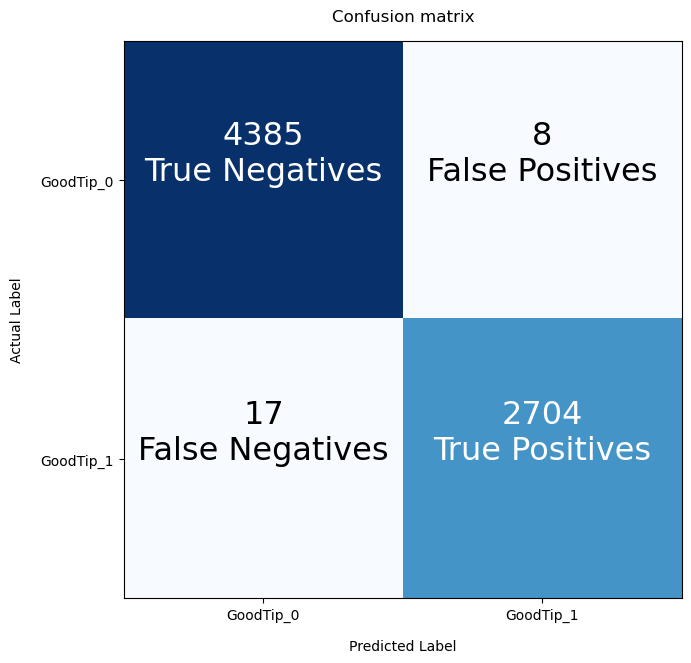

In [58]:
import itertools

class_names=['GoodTip_0', 'GoodTip_1']


# Computing confusion matrix here

plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

we can see that the above explained confusion matrix is what we have been able to achieve in plot as well.

#### Evaluation of Model

In [59]:
# Now Since i have applied the model, i would like to Evaluate them.
# for this i have created a dataframe with the variables that are used to measure the performance of the model.

quality_df = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC'], index = ['Logistic Regression',  'XGBooster'])


In [60]:
#  now lets use our new dataframe for the logistic regression model that we just applied and see the merics
#  here we have input the performance metrics variables in the column

quality_df.loc['Logistic Regression'] = [accuracy, precision, recall, f1, auc]

#### Performance Metrics

However before plot the heat map lets us understand what these metrics are and what information they give:

ACCURACY -- Accuracy is the ratio of correct predictions out of all predictions made by an algorithm. It can be calculated by dividing precision by recall or as 1 minus false negative rate (FNR) divided by false positive rate (FPR).

PRECISION --  The Precision is the ratio of true positives over the sum of false positives and true negatives. It is also known as positive predictive value. Precision is a useful metric and shows that out of those predicted as positive, how accurate the prediction was.

RECALL --  Recall is the ratio of correctly predicted outcomes to all predictions. It is also known as sensitivity or specificity.

F!-SCORE -- The F1-score combines these three metrics into one single metric that ranges from 0 to 1 and it takes into account both Precision and Recall.

AUC (Area Under the Curve) -- The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. Since we have spkone about ROC and we need to know what it is in order to understand AUC , lets define ROC as well.
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. 

Text(0.5, 36.72222222222221, 'Performance metrics')

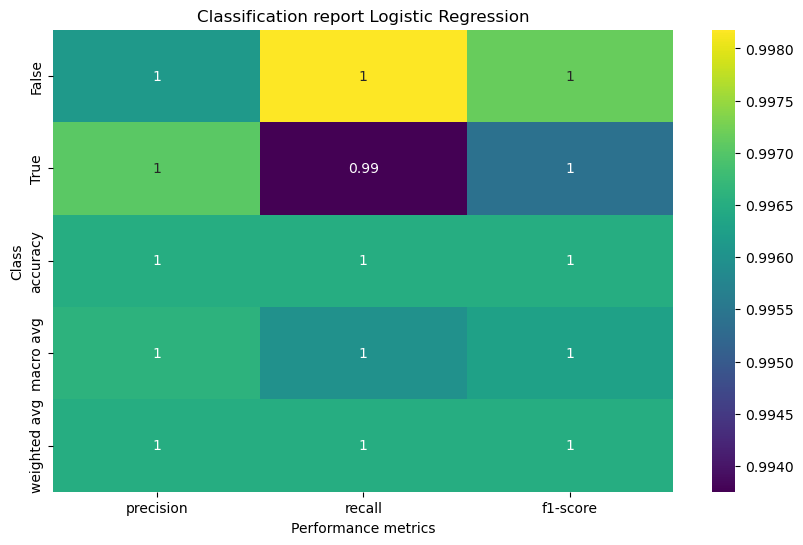

In [61]:
#  using heatmap i am Plotting the Classification Report for our logistic regression model

plt.figure(figsize=(10,6))
lgr_df = (pd.DataFrame(classification_report(y_test,y_pred, digits=3,
                                        output_dict=True)).T).iloc[:,:-1]
sns.heatmap(lgr_df, annot=True, cmap='viridis')
plt.title('Classification report Logistic Regression')
plt.ylabel('Class')
plt.xlabel('Performance metrics')


let us analyze the healtmap a little. we can observe that most of them are highly correlated as there values are 1. we can also observe that the 'true' and 'recall' has closely correlated as there value is .99 which means they are 99% correlated.

### XGBClassifier

Now lets explore more with our dataset and prediction models by applying a new model. I ham applying XGBoost here.
XGBoost is a robust machine-learning algorithm that helps us understand our data and make better decisions. It is an implementation of gradient-boosting decision trees. In this algorithm, decision trees are created in sequential form. 

XGBooster stands for Extreme Gradient Boosting. It is a scalable and distributed gradient-boosted decision tree (GBDT) machine learning library which provides parallel tree boosting. It is the leading machine learning library for regression, classification, and ranking problems.

In [62]:
# Just like in our last model i am label encoding the training data for target variable using labelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [63]:
# Training XGBoost on the Training set

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X = X_train,y =  y_train)

C:\Users\aiman\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\aiman\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###  Confusion Matrix for XGBooster

In [64]:
# Making the Confusion Matrix for this model

y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

[[4393    0]
 [   0 2721]]


#### Plotting Confusion Matrix for XGBooster

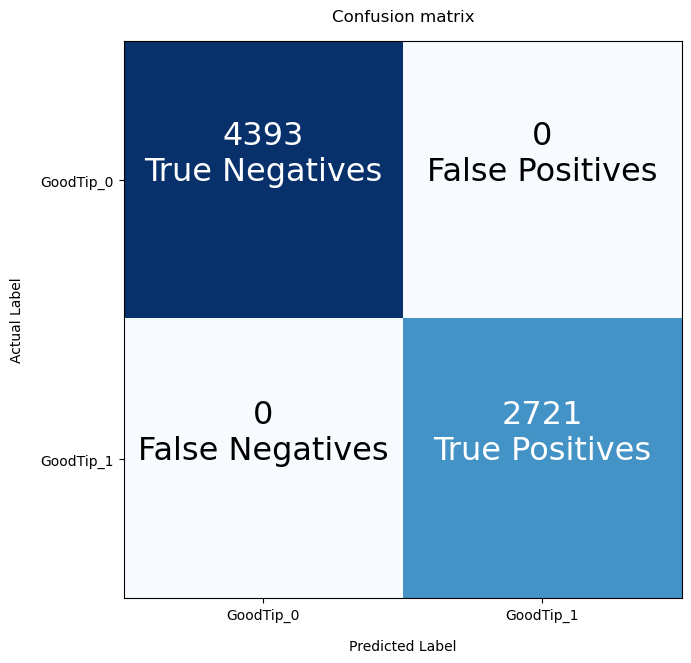

In [65]:
# lets Compute confusion matrix to visualize it and understand better

plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cm_xgb, classes=class_names, title='Confusion matrix')

we can observe our our model is showing 100% accuracy , which is not a very good result. As its very unrealistic to have a 100% accuracy.
lets analyze a little-

TRUE POSITIVES- we can see we predicted 2721 values to be as good tip and they wree actually under 'good tip' category.

TRUE NEGATIVES - we can observe that the model predicted 4393 as 'not good tips' that means there value is 0, and in actual there values were 0, that means they in real did not belong to 'good tip' category.

FALSE POSITIVE - we see that there are no false positives which means no value of 'non good tip' has been mistakenly predicted as a 'good tip'.

FALSE NEGATIVE - we see that there are no false negatives which means no value of 'good tip' has been mistakenly predicted as a ' non good tip'.

In [66]:
#  lets now implement our model into our performance metrics 
#  and check how well it has performed in terms of accuracy, precision and others

quality_df.loc['XGBooster'] = [accuracy, precision, recall, f1, auc]

### Comparision of different Classification Algorithm

In [67]:
quality_df

,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,0.996486,0.99705,0.993752,0.995398,0.995966
XGBooster,1.0,1.0,1.0,1.0,1.0


#### Observation of Classification model
From the comparision of both the Classification model I can can conclude that both are been a case of over-fitting as the prediction value is somewhere around 100%. However, wecan also observe that Logistic Regression is showing a much better result than  XGBooster classification. 

# Results<a id='the_r'></a>

So now lets put our model evaluation into a nutshell. I applied our dataset into two types of modelling - Regression and Classification. 

Lets review the Regression models we applied 4 types of regression models which are - Multiple linear, Decision Tree, Random Forest and SVR. Their description has been explained in their respective sections. After training the model with our training data, we tested in on our test data and for each of them we had different results. We calculated the R2, MAE and MSE for all of them and compared at the end. It was clear from the result that the best results was delivered by SVR which 79.2% accuracy. It is neither underfitting nor overfitting, therefore i consider its output to be better than others.

Under classification we tried two models - logistic regression and XGBooster. Using both the models we predicted if the 'GoodTip' variable. I later also made the confusion matrix for both the models. We also observed in the performance metric heat map that 'true' and 'recall' were highly correlated. It was observed that for XGBooster we got 100% accuracy which seems to be overfitting thus we cannot consider it to be a very good model. Therefore, we can conclude that for classification models logistic regression is better which shows 99% accuracy.

# Conclusion<a id='the_c'></a>

I would like to conclude the complete project analysis now. With the above analysis I personally it was an amaying dataset and it was very interesting to analyze it. Data preprocessing didnt required much work as data was quite clean without any missing values as well. 

In analysis I plotted various variables each other and found few of them were highly correlated, and exhibiting interesting relations. Time series analysis also showed interesting informations like how the time or hour of the day affects the travel decisions of people. 

In modelling we observed that Regression had a good prediction with 79% accuracy which was delievred by SVR, where as in classification best results were delivered by logistic regression. It was interesting to observe the confusion matrix for both the classifiers, as well as the heatmap of the performance metrics showing the accuracy, recall and other.

#### Overall, I would like to thank Professor Wilhelm for giving this oppurtunity of wonderful exploration of this dataset and give the chance to learn plentiful of important lessons. 
